# Modifica el tamaño de la caja a 2000 y 3000, manteniendo la densidad constante de puntos con respecto al inciso 1), calcula de nuevo las funciones de correlación para cada estimador del inciso 2) y comparalas, considerando sólo los datos del inciso 1a, y 1d.

In [1]:
# Aqui cargamos las liberias a usar
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import scipy.special
import numpy as np
import math

Definimos las funciones necesarias

Funcion para integrar las funciones de correlacion.

In [2]:
def integra(expresion, lcaja, nb):
    lmax = np.sqrt(2 * lcaja ** 2)
    dx = lmax / nb
    u = []
    for j in range(0, len(expresion)-1):
        are = np.abs((expresion[j] + expresion[j+1])/2 * dx)
        u.append(are)
    return u

Funciones para construir anillos de forma aleatoria dentro de la caja.

In [3]:
def construyearo(r, n):
    xx = []
    yy = []
    da = 360/n
    for i in range(0, n):
        fx = r * math.cos((i * da)*np.pi/180)
        fy = r * math.sin((i * da)*np.pi/180)
        xx.append(fx)
        yy.append(fy) 
    return xx, yy

def esparceanillos(nanillos, longcaja, radioaros, pxanillo):
    px, py = construyearo(radioaros, pxanillo)
    x = []
    y = []
    for i in range(0, nanillos):
        centrox = np.random.uniform(-longcaja/2, longcaja/2)
        centroy = np.random.uniform(-longcaja/2, longcaja/2)
        for j in range(0, pxanillo):
            mx = px[j] + centrox
            my = py[j] + centroy
            if mx > -longcaja/2 and mx < longcaja/2:                
                if my > -longcaja/2 and my < longcaja/2:
                    x.append(mx+longcaja/2)
                    y.append(my+longcaja/2)
    return x, y

Funcion para construir caja

In [4]:
def construyecaja (l, s):
    nxlado = int(l / s)
    ntot = nxlado ** 2
    px = []
    py = []
    c = 1
    for i in range(1, nxlado):
        for j in range(1, nxlado):
            px.append(s * i)
            py.append(s * j)
            c += 1
    return px, py

Funcion para obtener la distancia entre los puntos(sin repetir)

In [5]:
def distancia(x1,y1):
    d = []
    i=0
    while i <= (len(x1) - 1):
        j = (i + 1)
        while j < len(x1):
            d.append(pow(((x1[i] - x1[j]) ** 2 + (y1[i] - y1[j]) ** 2), 0.5))
            j = j + 1
        i= i + 1
    return d

Funcion para obtener la distancia entre los puntos de una distribucion aleatoria y una en forma de malla (sin repetir)

In [6]:
def distanciadr(x1,y1, xr, yr):
    d = []
    i=0
    while i <= (len(x1) - 1):
        j = (i + 1)
        while j < len(x1):
            d.append(pow(((x1[i] - xr[j]) ** 2 + (y1[i] - yr[j]) ** 2), 0.5))
            j = j + 1
        i= i + 1
    return d

Funcion para la correlacion de Hamilton

In [7]:
def fham(xm, ym, xr, yr, lcaja, nb):
    lmax = np.sqrt(2 * lcaja ** 2)  # Longitud maxima que puede haber en la caja
    dmalla = []
    drandom = []
    co = []
    
    dmalla = distancia(xm, ym) # Calculamos la distancia entre los puntos del arreglo en malla
    drandom = distancia(xr, yr) # Calculamos la distancia entre los puntos del arreglo de puntos aleatorios
    ddr = distanciadr(xm, ym, xr, yr) # Calculamos la distancia entre los puntos ordenados y los aleatorios
    
    dd, nbm = np.histogram(dmalla, bins = nb)
    rr, nbr = np.histogram(drandom, bins = nb)
    dr, nbrd = np.histogram(ddr, bins = nb)
    
    co = np.abs(dd * rr) / (dr ** 2) - 1# Calculamos la funcion de correlacion entre los histogramas

    x = np.linspace(0, lmax, len(co))
    
    plt.figure()
    plt.figure(figsize=(15,5))
    plt.plot(x, co, 'bo-', label='$Hamilton$', color = 'r')
    plt.legend()
    
    ham = integra(co, lcaja, nb)
    
    x2 = np.linspace(0, lmax, len(ham))
    
    plt.figure()
    plt.figure(figsize=(15,5))
    plt.plot(x2, ham, 'bo-', label='$Integral$', color = 'r')
    plt.legend()
    print( "Valor de la integral de la funcion de correlacion: ", sum(ham))
    return co

Funcion para la correlacion de Peebles - Hauser

In [8]:
def fpeha(xm, ym, xr, yr, lcaja, nb):
    lmax = np.sqrt(2 * lcaja ** 2)  # Longitud maxima que puede haber en la caja
    nrd = len(xr)
    n = len(xm)
    dmalla = []
    drandom = []
    co = []
    
    dmalla = distancia(xm, ym) # Calculamos la distancia entre los puntos del arreglo en malla
    drandom = distancia(xr, yr) # Calculamos la distancia entre los puntos del arreglo de puntos aleatorios
    # ddr = distanciadr(xm, ym, xr, yr) # Calculamos la distancia entre los puntos ordenados y los aleatorios
    
    dd, nbm = np.histogram(dmalla, bins = nb)
    rr, nbr = np.histogram(drandom, bins = nb)
    # dr, nbrd = np.histogram(ddr, bins = nb)
    
    co = (nrd / n) ** 2 * (dd / rr) - 1 # Calculamos la funcion de correlacion entre los histogramas

    x = np.linspace(0, lmax, len(co))

    plt.figure()
    plt.figure(figsize=(15,5))
    plt.plot(x, co, 'bo-', label='$Peebles - Hauser$', color = 'g')
    plt.legend()
    
    ph = integra(co, lcaja, nb)
    
    x2 = np.linspace(0, lmax, len(ph))
    
    plt.figure()
    plt.figure(figsize=(15,5))
    plt.plot(x2, ph, 'bo-', label='$Integral$', color = 'g')
    plt.legend()
    print( "Valor de la integral de la funcion de correlacion: ", sum(ph))
    return co

Funcion para la correlacion de Estimador de Davis - Peebles

In [9]:
def fdape(xm, ym, xr, yr, lcaja, nb):
    lmax = np.sqrt(2 * lcaja ** 2)  # Longitud maxima que puede haber en la caja
    nrd = len(xr)
    n = len(xm)
    dmalla = []
    drandom = []
    co = []
    
    dmalla = distancia(xm, ym) # Calculamos la distancia entre los puntos del arreglo en malla
    # drandom = distancia(xr, yr) # Calculamos la distancia entre los puntos del arreglo de puntos aleatorios
    ddr = distanciadr(xm, ym, xr, yr) # Calculamos la distancia entre los puntos ordenados y los aleatorios
    
    dd, nbm = np.histogram(dmalla, bins = nb)
    # rr, nbr = np.histogram(drandom, bins = nb)
    dr, nbrd = np.histogram(ddr, bins = nb)
    
    co = (nrd / n) * (dd / dr) - 1 # Calculamos la funcion de correlacion entre los histogramas

    x = np.linspace(0, lmax, len(co))

    plt.figure()
    plt.figure(figsize=(15,5))
    plt.plot(x, co, 'bo-', label='$Davis - Peebles$', color = 'm')
    plt.legend()
    
    ph = integra(co, lcaja, nb)
    
    x2 = np.linspace(0, lmax, len(ph))
    
    plt.figure()
    plt.figure(figsize=(15,5))
    plt.plot(x2, ph, 'bo-', label='$Integral$', color = 'm')
    plt.legend()
    print( "Valor de la integral de la funcion de correlacion: ", sum(ph))
    return co

Funcion para la correlacion de Landy - Szalay

In [10]:
def flasz(xm, ym, xr, yr, lcaja, nb):
    lmax = np.sqrt(2 * lcaja ** 2)  # Longitud maxima que puede haber en la caja
    nrd = len(xr)
    n = len(xm)
    dmalla = []
    drandom = []
    co = []
    
    dmalla = distancia(xm, ym) # Calculamos la distancia entre los puntos del arreglo en malla
    drandom = distancia(xr, yr) # Calculamos la distancia entre los puntos del arreglo de puntos aleatorios
    ddr = distanciadr(xm, ym, xr, yr) # Calculamos la distancia entre los puntos ordenados y los aleatorios
    
    dd, nbm = np.histogram(dmalla, bins = nb)
    rr, nbr = np.histogram(drandom, bins = nb)
    dr, nbrd = np.histogram(ddr, bins = nb)
    
    co = 1 + (dd / rr) * ((nrd / n) ** 2) - 2 * (dr / rr) * (nrd / n) # Calculamos la funcion de correlacion entre los histogramas

    x = np.linspace(0, lmax, len(co))

    plt.figure()
    plt.figure(figsize=(15,5))
    plt.plot(x, co, 'bo-', label='$Landy - Szalay$', color = 'k')
    
    
    ph = integra(co, lcaja, nb)
    
    x2 = np.linspace(0, lmax, len(ph))
    
    plt.figure()
    plt.figure(figsize=(15,5))
    plt.plot(x2, ph, 'bo-', label='$Integral$', color = 'k')
    plt.legend()
    print( "Valor de la integral de la funcion de correlacion: ", sum(ph))
    return co


## Modificamos el tamaño de la caja a 2000, ajustamos la separacion de puntos a 45.

In [11]:
separacion = 45
longitud = 2000

Construimos una muestra ordenada de puntos dentro de una caja de longitud 2000 y con separacion 45 entre puntos, ademas,  una muestra aleatoria con el mismo numero de puntos que la muestra ordenada

In [12]:
x1, y1 = construyecaja(longitud, separacion)
x2 = np.random.uniform(0, longitud, len(x1))
y2 = np.random.uniform(0, longitud, len(x1))

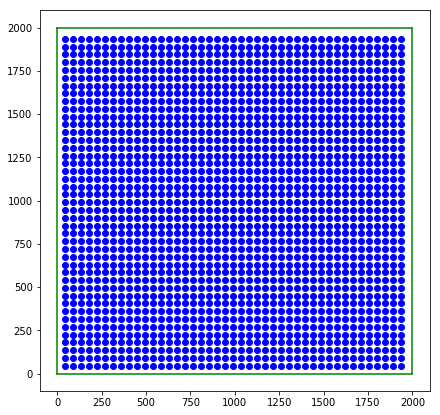

In [27]:
q1 = np.linspace(0, 0, 2)
q2 = np.linspace(0, longitud, 2)
q3 = np.linspace(longitud, longitud, 2)

plt.figure(figsize=(7, 7))
plt.plot(q1, q2, color = 'g')
plt.plot(q3, q2, color = 'g')
plt.plot(q2, q3, color = 'g')
plt.plot(q2, q1, color = 'g')

plt.plot(x1, y1, "bo")

In [35]:
len(x1)

1849

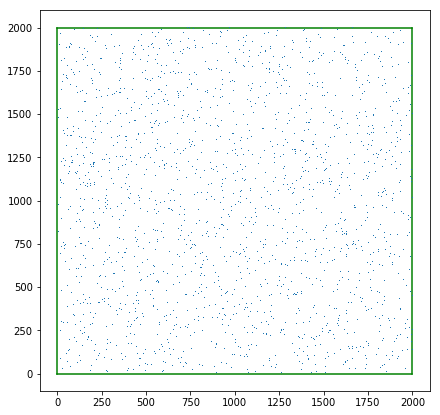

In [28]:
q1 = np.linspace(0, 0, 2)
q2 = np.linspace(0, longitud, 2)
q3 = np.linspace(longitud, longitud, 2)

plt.figure(figsize=(7, 7))
plt.plot(q1, q2, color = 'g')
plt.plot(q3, q2, color = 'g')
plt.plot(q2, q3, color = 'g')
plt.plot(q2, q1, color = 'g')

plt.plot(x2, y2, ",")

Construimos la caja con los anillos aleatorios.

Establecemos que la funcion generara 50 anillos de radio 40 y con 100 puntos cada uno

In [13]:
nanillos = 50
pxanillo = 100
ranillos = 40

In [14]:
x3, y3 = esparceanillos(nanillos, longitud, 300, pxanillo)

In [33]:
len(x3)

4236

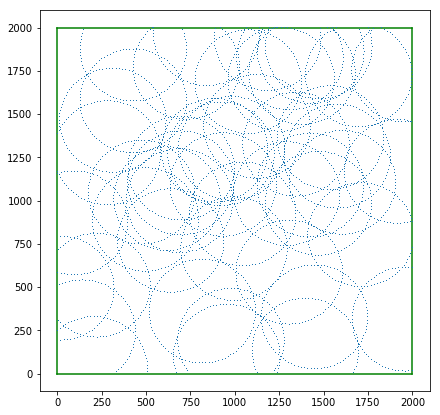

In [34]:
q1 = np.linspace(0, 0, 2)
q2 = np.linspace(0, longitud, 2)
q3 = np.linspace(longitud, longitud, 2)

plt.figure(figsize=(7, 7))

plt.plot(q1, q2, color = 'g')
plt.plot(q3, q2, color = 'g')
plt.plot(q2, q3, color = 'g')
plt.plot(q2, q1, color = 'g')
plt.plot(x3,y3, ",")

Generamos una muestra aleatoria con el mismo numero de puntos que la caja de anillos

In [15]:
x4 = np.random.uniform(0, longitud, len(x3))
y4 = np.random.uniform(0, longitud, len(x3))

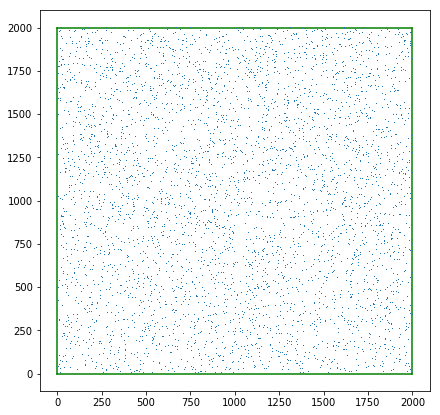

In [37]:
q1 = np.linspace(0, 0, 2)
q2 = np.linspace(0, longitud, 2)
q3 = np.linspace(longitud, longitud, 2)

plt.figure(figsize=(7, 7))
plt.plot(q1, q2, color = 'g')
plt.plot(q3, q2, color = 'g')
plt.plot(q2, q3, color = 'g')
plt.plot(q2, q1, color = 'g')

plt.plot(x4, y4, ",")

# Ejercicio 1a

### Generamos los histogramas DD, RR y DR con la muestra aleatoria y la ordenada para escoger un numero de bins adecuado.

In [16]:
dmalla0 = distancia(x1, y1) # Calculamos la distancia entre los puntos del arreglo en malla
drandom0 = distancia(x2, y2) # Calculamos la distancia entre los puntos del arreglo de puntos aleatorios
ddr0 = distanciadr(x1, y1, x2, y2) # Calculamos la distancia entre los puntos ordenados y los aleatorios

In [17]:
nbins = 19

<Figure size 432x288 with 0 Axes>

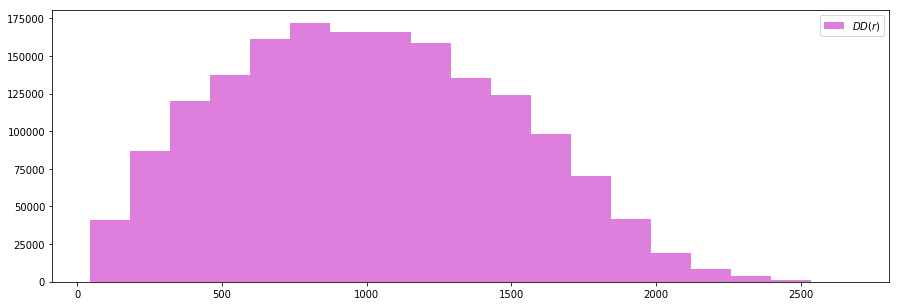

<Figure size 432x288 with 0 Axes>

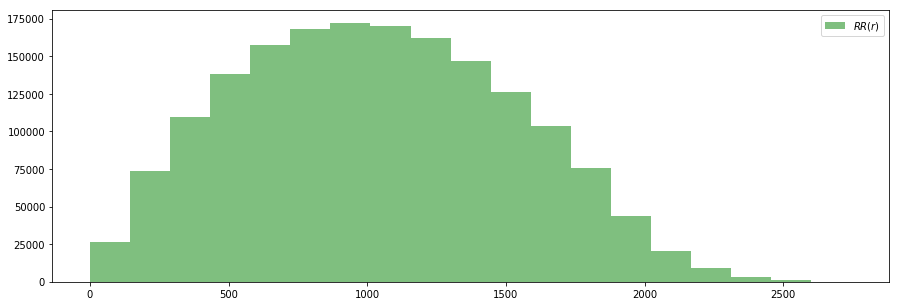

<Figure size 432x288 with 0 Axes>

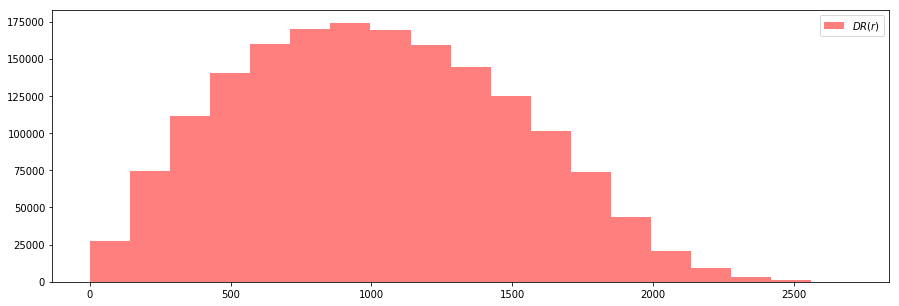

<Figure size 432x288 with 0 Axes>

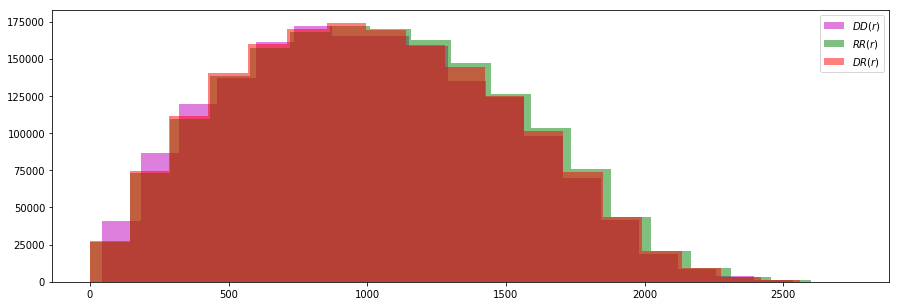

In [40]:
plt.figure()
plt.figure(figsize=(15,5))
plt.hist(dmalla0, bins=nbins, color = 'm' , alpha =0.5, label='$DD(r)$')
plt.legend()
plt.figure()
plt.figure(figsize=(15,5))
plt.hist(drandom0, bins=nbins, color = 'g' , alpha =0.5, label='$RR(r)$')
plt.legend()
plt.figure()
plt.figure(figsize=(15,5))
plt.hist(ddr0, bins=nbins, color = 'r' , alpha =0.5, label='$DR(r)$')
plt.legend()
plt.figure()
plt.figure(figsize=(15,5))
plt.hist(dmalla0, bins=nbins, color = 'm' , alpha =0.5, label='$DD(r)$')
plt.hist(drandom0, bins=nbins, color = 'g' , alpha =0.5, label='$RR(r)$')
plt.hist(ddr0, bins=nbins, color = 'r' , alpha =0.5, label='$DR(r)$')
plt.legend()

### Calculamos los estimadores y su integral

### Funcion de correlacion de Hamilton

Valor de la integral de la funcion de correlacion:  346.43224986417


<Figure size 432x288 with 0 Axes>

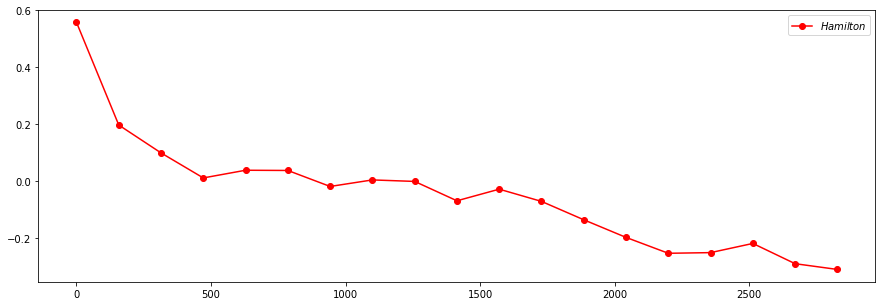

<Figure size 432x288 with 0 Axes>

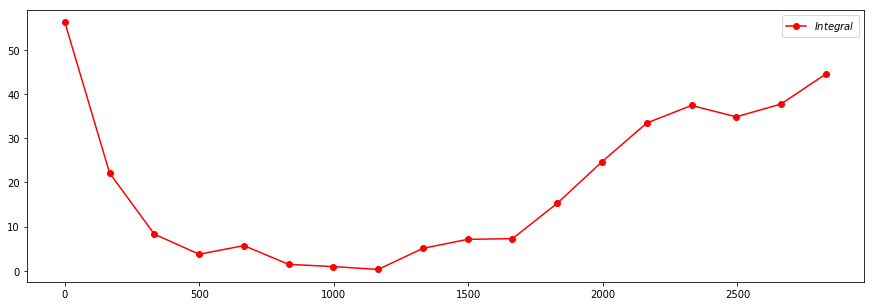

In [18]:
comparar1 = fham(x1, y1, x2, y2, longitud, nbins)

### Funcion de correlacion de Peebles - Hauser

Valor de la integral de la funcion de correlacion:  170.85991512491486


<Figure size 432x288 with 0 Axes>

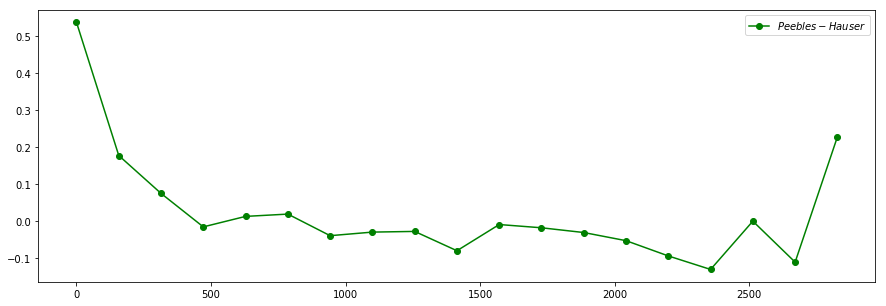

<Figure size 432x288 with 0 Axes>

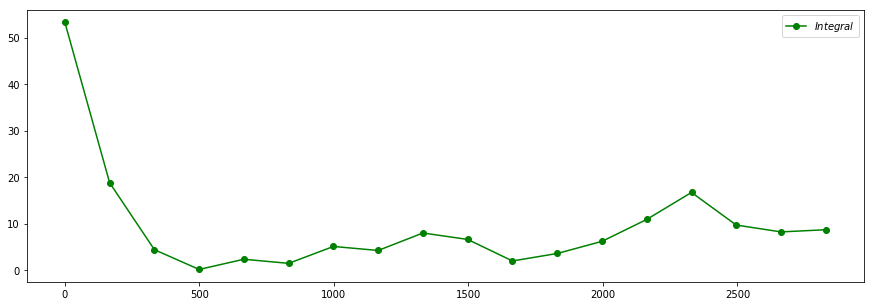

In [19]:
comparar2 = fpeha(x1, y1, x2, y2, longitud, nbins)

### Funcion de correlacion de Davis - Peebles

Valor de la integral de la funcion de correlacion:  254.12085732075676


<Figure size 432x288 with 0 Axes>

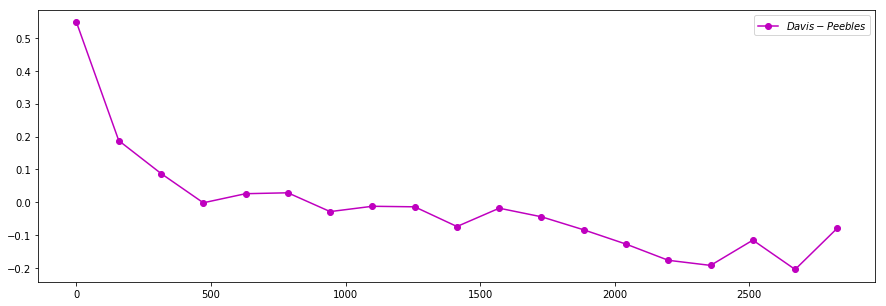

<Figure size 432x288 with 0 Axes>

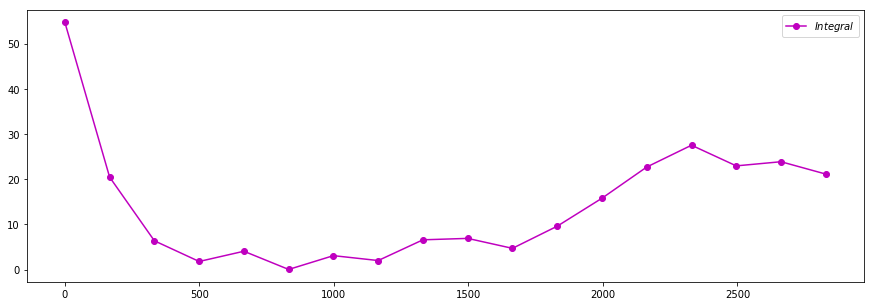

In [20]:
comparar3 = fdape(x1, y1, x2, y2, longitud, nbins)

### Funcion de correlacion de Landy - Szalay

Valor de la integral de la funcion de correlacion:  387.69172407223573


<Figure size 432x288 with 0 Axes>

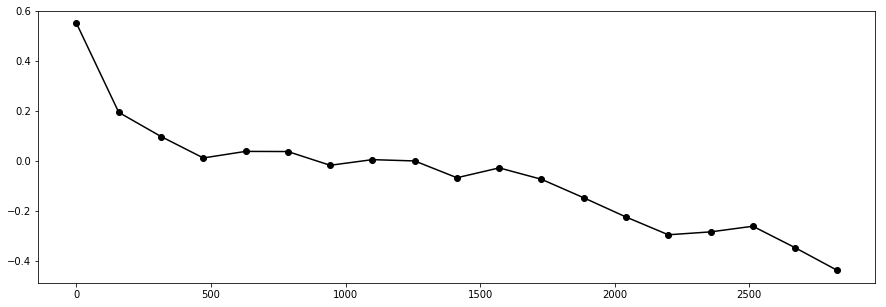

<Figure size 432x288 with 0 Axes>

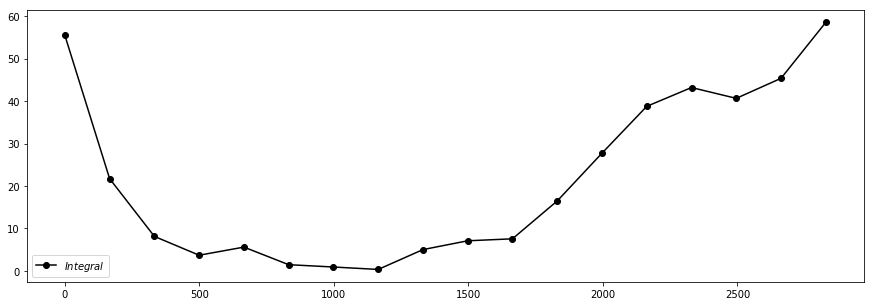

In [21]:
comparar4 = flasz(x1, y1, x2, y2, longitud, nbins)

### Para comparar las funciones de correlacion las graficamos en una sola figura

<Figure size 432x288 with 0 Axes>

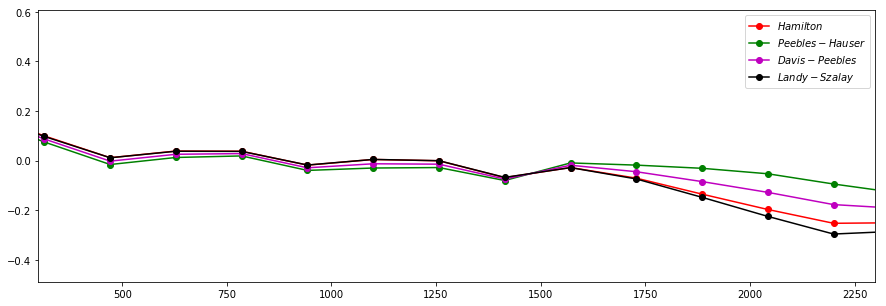

In [22]:
lmax = np.sqrt(2 * longitud ** 2)
x = np.linspace(0, lmax, len(comparar1))
plt.figure()
plt.figure(figsize=(15,5))
plt.plot(x, comparar1, 'bo-', label='$Hamilton$', color = 'r')
plt.plot(x, comparar2, 'bo-', label='$Peebles - Hauser$', color = 'g')
plt.plot(x, comparar3, 'bo-', label='$Davis - Peebles$', color = 'm')
plt.plot(x, comparar4, 'bo-', label='$Landy - Szalay$', color = 'k')
plt.xlim(300, 2300)
plt.legend()

# Ejercicio 1d

### Generamos los histogramas DD, RR y DR con la muestra aleatoria y la ordenada para escoger un numero de bins adecuado.

In [23]:
dmalla1 = distancia(x3, y3) # Calculamos la distancia entre los puntos del arreglo en malla
drandom1 = distancia(x4, y4) # Calculamos la distancia entre los puntos del arreglo de puntos aleatorios
ddr1 = distanciadr(x3, y3, x4, y4) # Calculamos la distancia entre los puntos ordenados y los aleatorios

In [162]:
len(dmalla1)

6507028

In [24]:
nbins2 = 23

<Figure size 432x288 with 0 Axes>

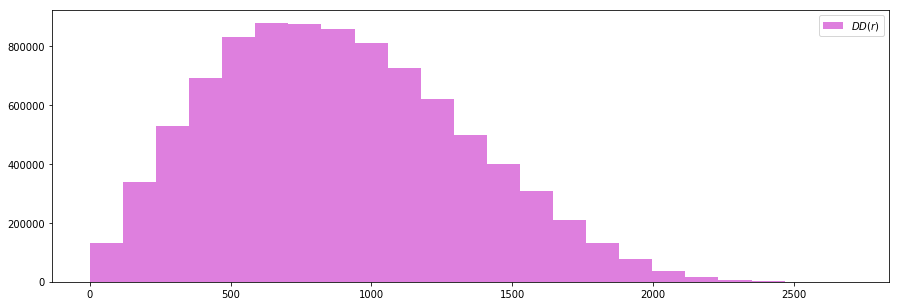

<Figure size 432x288 with 0 Axes>

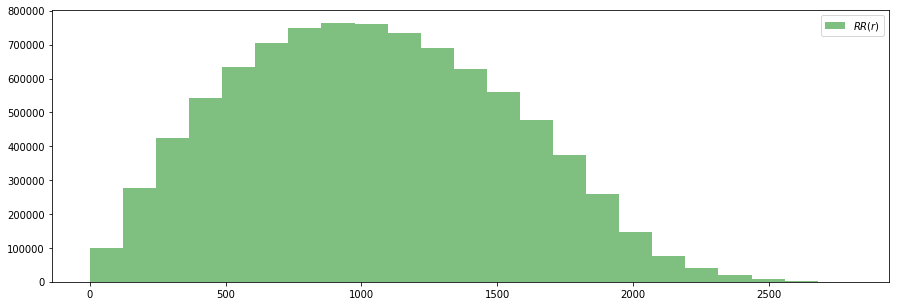

<Figure size 432x288 with 0 Axes>

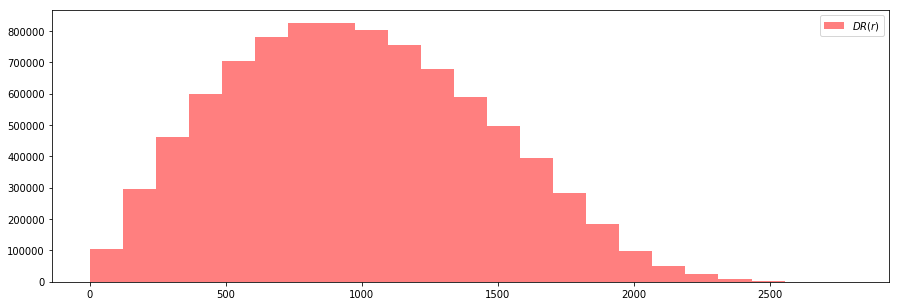

<Figure size 432x288 with 0 Axes>

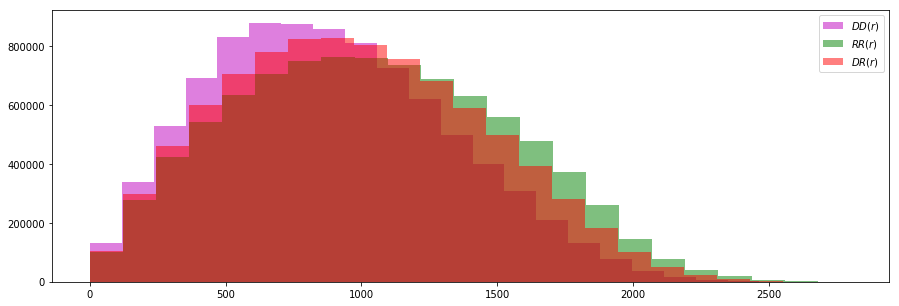

In [60]:
plt.figure()
plt.figure(figsize=(15,5))
plt.hist(dmalla1, bins=nbins2, color = 'm' , alpha =0.5, label='$DD(r)$')
plt.legend()
plt.figure()
plt.figure(figsize=(15,5))
plt.hist(drandom1, bins=nbins2, color = 'g' , alpha =0.5, label='$RR(r)$')
plt.legend()
plt.figure()
plt.figure(figsize=(15,5))
plt.hist(ddr1, bins=nbins2, color = 'r' , alpha =0.5, label='$DR(r)$')
plt.legend()
plt.figure()
plt.figure(figsize=(15,5))
plt.hist(dmalla1, bins=nbins2, color = 'm' , alpha =0.5, label='$DD(r)$')
plt.hist(drandom1, bins=nbins2, color = 'g' , alpha =0.5, label='$RR(r)$')
plt.hist(ddr1, bins=nbins2, color = 'r' , alpha =0.5, label='$DR(r)$')
plt.legend()

### Calculamos los estimadores y su integral

### Funcion de correlacion de Hamilton

Valor de la integral de la funcion de correlacion:  1093.0781843534169


<Figure size 432x288 with 0 Axes>

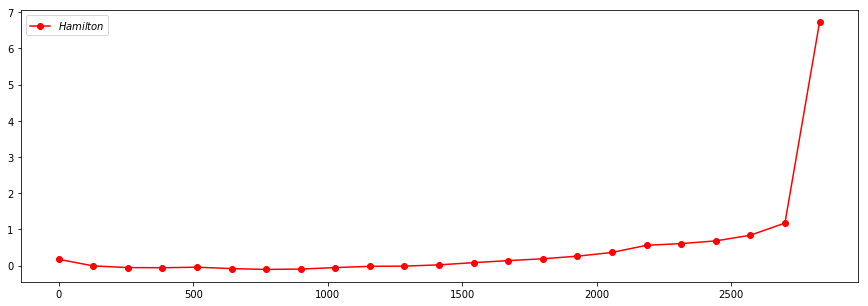

<Figure size 432x288 with 0 Axes>

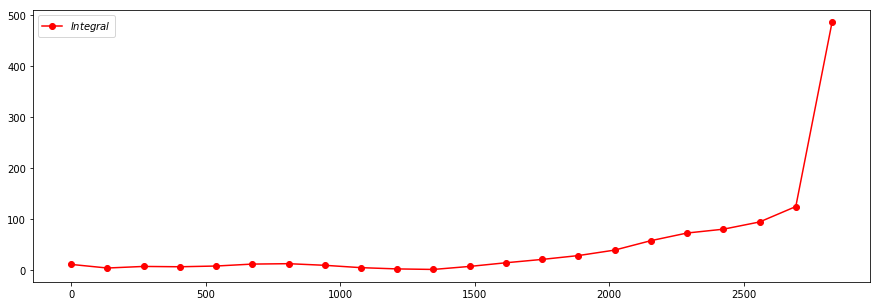

In [25]:
comparara = fham(x3, y3, x4, y4, longitud, nbins2)

### Funcion de correlacion de Peebles - Hauser

Valor de la integral de la funcion de correlacion:  282.9302396416405


<Figure size 432x288 with 0 Axes>

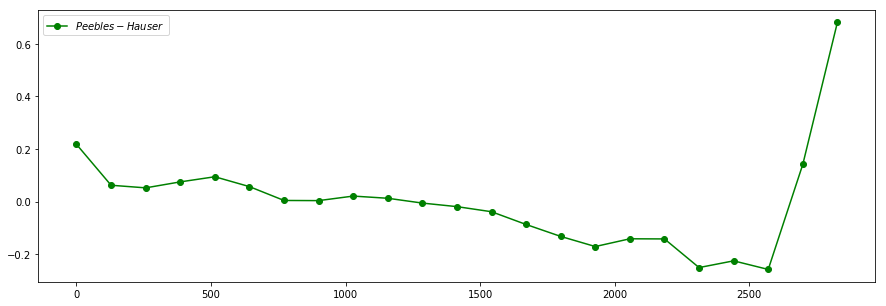

<Figure size 432x288 with 0 Axes>

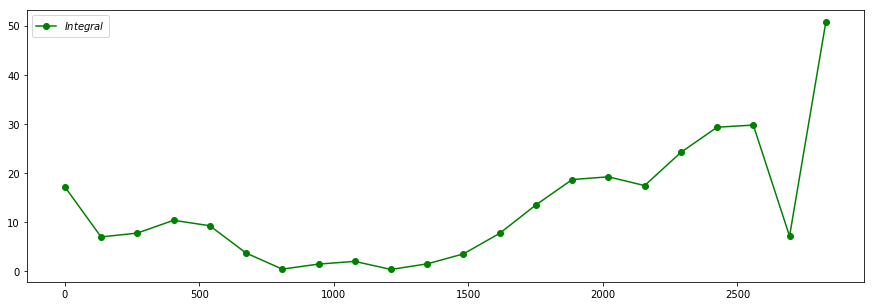

In [26]:
compararb = fpeha(x3, y3, x4, y4, longitud, nbins2)

### Funcion de correlacion de Davis - Peebles

Valor de la integral de la funcion de correlacion:  355.3730032437993


<Figure size 432x288 with 0 Axes>

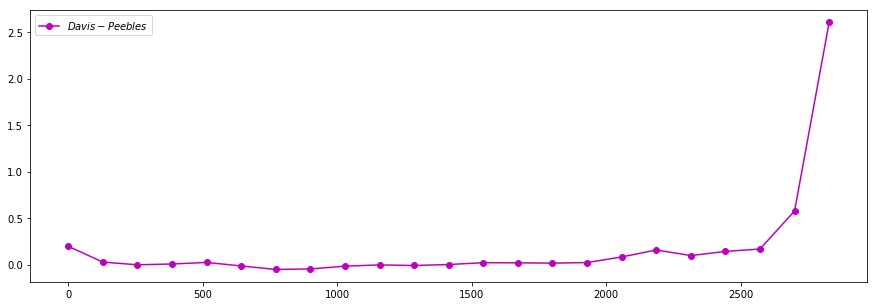

<Figure size 432x288 with 0 Axes>

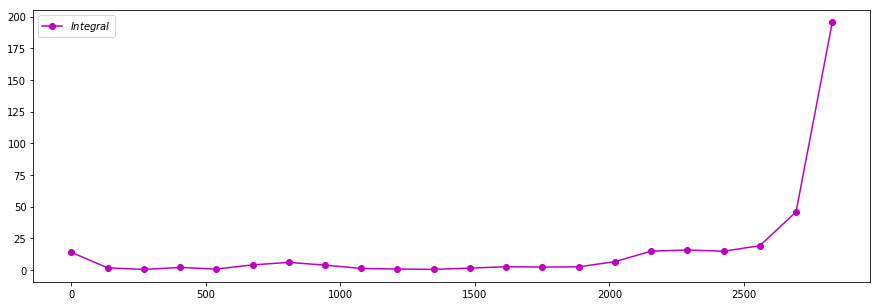

In [27]:
compararc = fdape(x3, y3, x4, y4, longitud, nbins2)

### Funcion de correlacion de Landy - Szalay

Valor de la integral de la funcion de correlacion:  578.6964387745658


<Figure size 432x288 with 0 Axes>

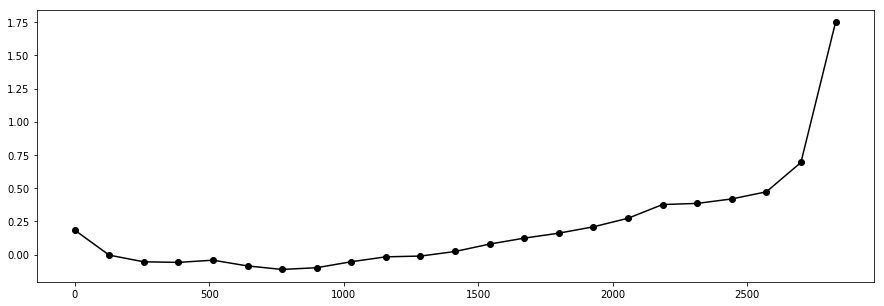

<Figure size 432x288 with 0 Axes>

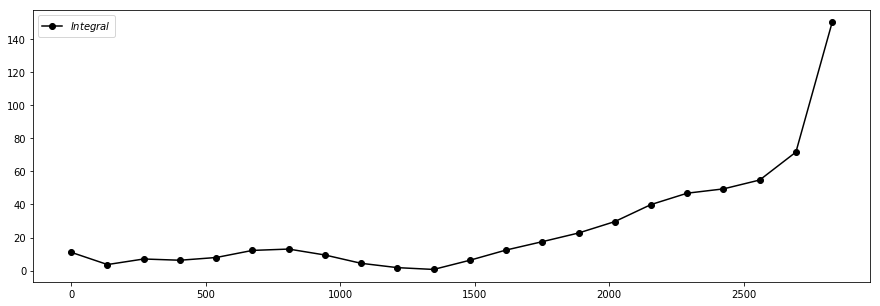

In [28]:
comparard = flasz(x3, y3, x4, y4, longitud, nbins2)

### Para comparar las funciones de correlacion las graficamos en una sola figura

<Figure size 432x288 with 0 Axes>

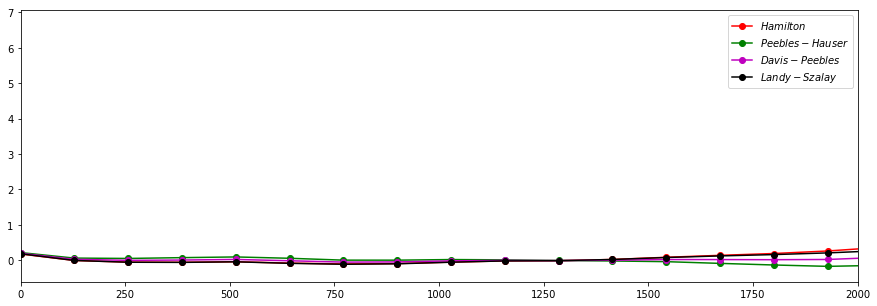

In [29]:
lmax = np.sqrt(2 * longitud ** 2)
x = np.linspace(0, lmax, len(comparara))
plt.figure()
plt.figure(figsize=(15,5))
plt.plot(x, comparara, 'bo-', label='$Hamilton$', color = 'r')
plt.plot(x, compararb, 'bo-', label='$Peebles - Hauser$', color = 'g')
plt.plot(x, compararc, 'bo-', label='$Davis - Peebles$', color = 'm')
plt.plot(x, comparard, 'bo-', label='$Landy - Szalay$', color = 'k')
plt.xlim(0, 2000)
plt.legend()

Para la caja de longitud 3000 y de misma densidad que la de 2000, calculamos la densidad de la caja de 2000 y usamos el numero de puntos requerido para la caja de longitud 3000

In [67]:
len(x1)

1849

In [70]:
densidad  = 1849 / (2000 * 2000)

In [71]:
densidad

0.00046225

In [101]:
densidad2 = 4096 / (3000 * 3000)

In [102]:
densidad2

0.0004551111111111111

## Modificamos el tamaño de la caja a 3000, ajustamos la separacion de puntos a 46 para mantener la densidad constante

In [30]:
separacion5 = 46
longitud5 = 3000

Construimos una muestra ordenada de puntos dentro de una caja de longitud 2000 y con separacion 45 entre puntos, ademas,  una muestra aleatoria con el mismo numero de puntos que la muestra ordenada

In [31]:
x5, y5 = construyecaja(longitud5, separacion5)
x6 = np.random.uniform(0, longitud5, len(x5))
y6 = np.random.uniform(0, longitud5, len(x5))

In [117]:
len(x5)

4096

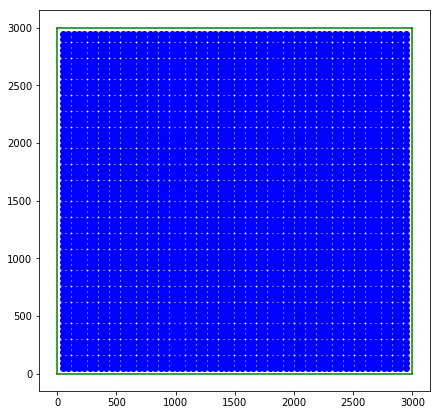

In [121]:
q1 = np.linspace(0, 0, 2)
q2 = np.linspace(0, longitud5, 2)
q3 = np.linspace(longitud5, longitud5, 2)

plt.figure(figsize=(7, 7))
plt.plot(q1, q2, color = 'g')
plt.plot(q3, q2, color = 'g')
plt.plot(q2, q3, color = 'g')
plt.plot(q2, q1, color = 'g')

plt.plot(x5, y5, "bo")

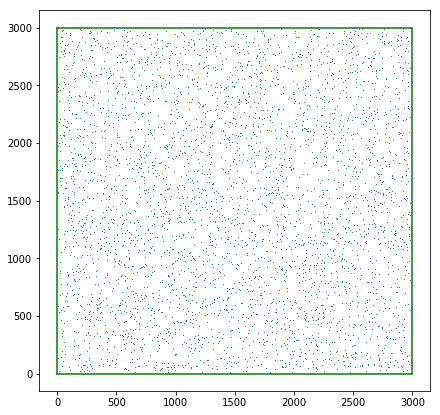

In [122]:
q1 = np.linspace(0, 0, 2)
q2 = np.linspace(0, longitud5, 2)
q3 = np.linspace(longitud5, longitud5, 2)

plt.figure(figsize=(7, 7))
plt.plot(q1, q2, color = 'g')
plt.plot(q3, q2, color = 'g')
plt.plot(q2, q3, color = 'g')
plt.plot(q2, q1, color = 'g')

plt.plot(x6, y6, ",")

Construimos la caja con los anillos aleatorios.

Calculamos los puntos necesarios para mantener la densidad constante

In [126]:
den = len(x3)

In [127]:
den

4303

In [128]:
densidad  = 4303 / (2000 * 2000)

In [129]:
densidad

0.00107575

In [132]:
densidad2 = 9675 / (3000 * 3000)

In [133]:
densidad2

0.001075

Establecemos que la funcion generara 50 anillos de radio 40 y con 100 puntos cada uno

In [32]:
nanillos2 = 112
pxanillo2 = 100
ranillos2 = 40

In [33]:
x7, y7 = esparceanillos(nanillos2, longitud5, 300, pxanillo2)

In [155]:
len(x7)

9784

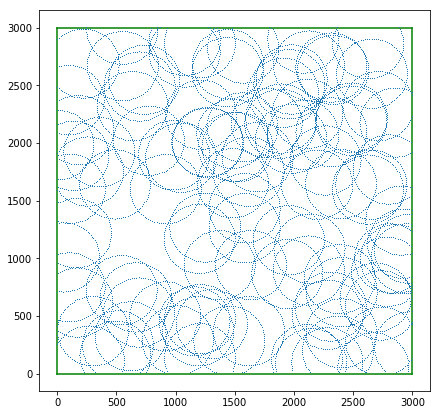

In [156]:
q1 = np.linspace(0, 0, 2)
q2 = np.linspace(0, longitud5, 2)
q3 = np.linspace(longitud5, longitud5, 2)

plt.figure(figsize=(7, 7))

plt.plot(q1, q2, color = 'g')
plt.plot(q3, q2, color = 'g')
plt.plot(q2, q3, color = 'g')
plt.plot(q2, q1, color = 'g')
plt.plot(x7,y7, ",")

Generamos una muestra aleatoria con el mismo numero de puntos que la caja de anillos

In [34]:
x8 = np.random.uniform(0, longitud5, len(x7))
y8 = np.random.uniform(0, longitud5, len(x7))

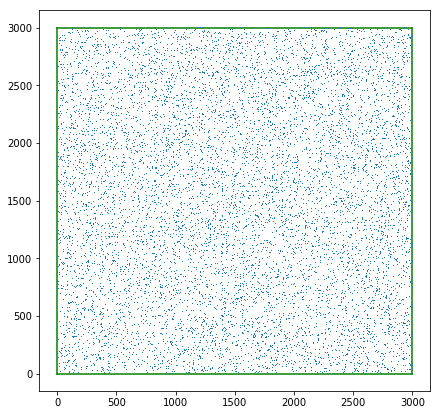

In [158]:
q1 = np.linspace(0, 0, 2)
q2 = np.linspace(0, longitud5, 2)
q3 = np.linspace(longitud5, longitud5, 2)

plt.figure(figsize=(7, 7))
plt.plot(q1, q2, color = 'g')
plt.plot(q3, q2, color = 'g')
plt.plot(q2, q3, color = 'g')
plt.plot(q2, q1, color = 'g')

plt.plot(x8, y8, ",")

# Ejercicio 1a

### Generamos los histogramas DD, RR y DR con la muestra aleatoria y la ordenada para escoger un numero de bins adecuado.

In [35]:
dmalla5 = distancia(x5, y5) # Calculamos la distancia entre los puntos del arreglo en malla
drandom5 = distancia(x6, y6) # Calculamos la distancia entre los puntos del arreglo de puntos aleatorios
ddr5 = distanciadr(x5, y5, x6, y6) # Calculamos la distancia entre los puntos ordenados y los aleatorios

In [36]:
nbins5 = 26

<Figure size 432x288 with 0 Axes>

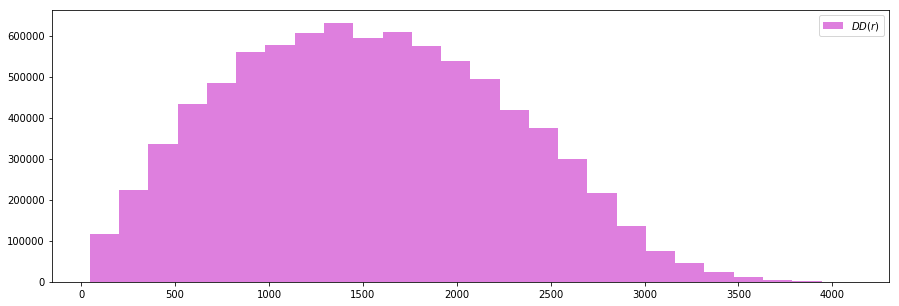

<Figure size 432x288 with 0 Axes>

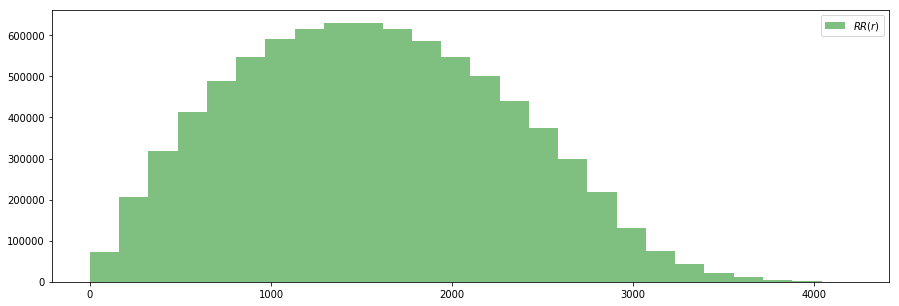

<Figure size 432x288 with 0 Axes>

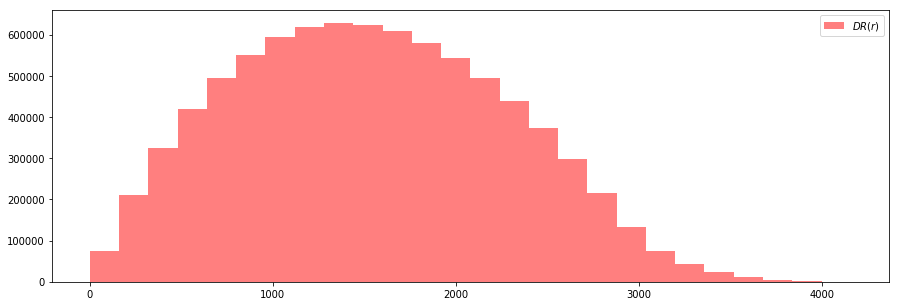

<Figure size 432x288 with 0 Axes>

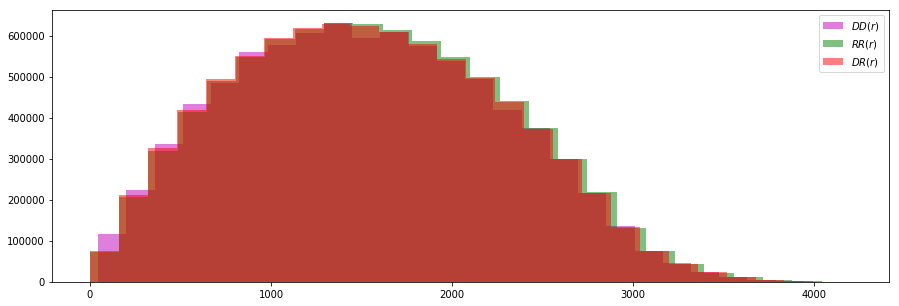

In [164]:
plt.figure()
plt.figure(figsize=(15,5))
plt.hist(dmalla5, bins=nbins5, color = 'm' , alpha =0.5, label='$DD(r)$')
plt.legend()
plt.figure()
plt.figure(figsize=(15,5))
plt.hist(drandom5, bins=nbins5, color = 'g' , alpha =0.5, label='$RR(r)$')
plt.legend()
plt.figure()
plt.figure(figsize=(15,5))
plt.hist(ddr5, bins=nbins5, color = 'r' , alpha =0.5, label='$DR(r)$')
plt.legend()
plt.figure()
plt.figure(figsize=(15,5))
plt.hist(dmalla5, bins=nbins5, color = 'm' , alpha =0.5, label='$DD(r)$')
plt.hist(drandom5, bins=nbins5, color = 'g' , alpha =0.5, label='$RR(r)$')
plt.hist(ddr5, bins=nbins5, color = 'r' , alpha =0.5, label='$DR(r)$')
plt.legend()

### Calculamos los estimadores y su integral

### Funcion de correlacion de Hamilton

Valor de la integral de la funcion de correlacion:  241.99684750614176


<Figure size 432x288 with 0 Axes>

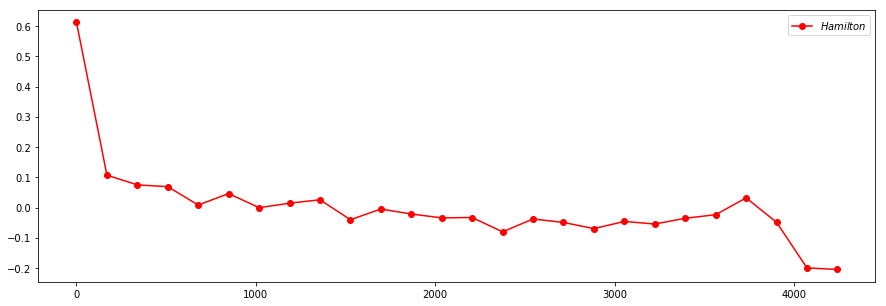

<Figure size 432x288 with 0 Axes>

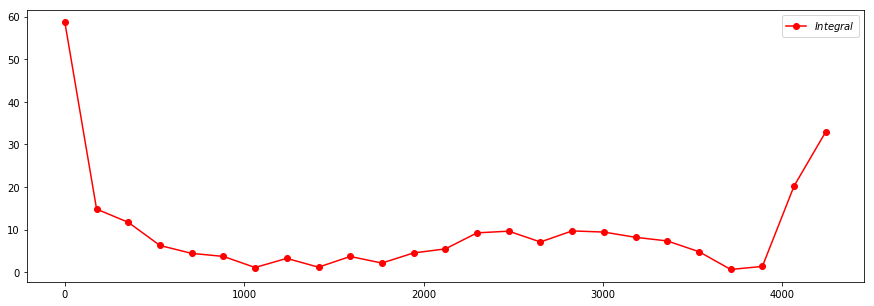

In [37]:
comparar11 = fham(x5, y5, x6, y6, longitud5, nbins5)

### Funcion de correlacion de Peebles - Hauser

Valor de la integral de la funcion de correlacion:  313.8169062766635


<Figure size 432x288 with 0 Axes>

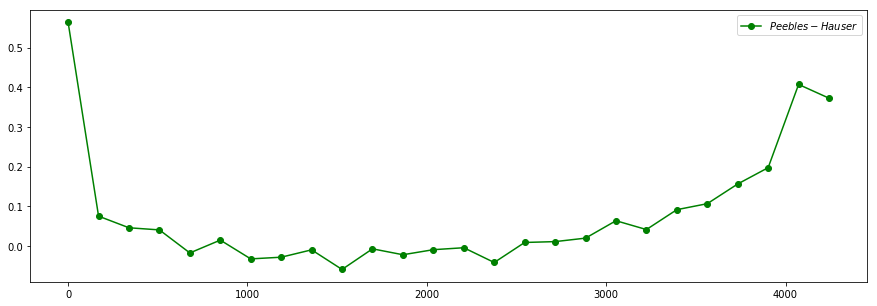

<Figure size 432x288 with 0 Axes>

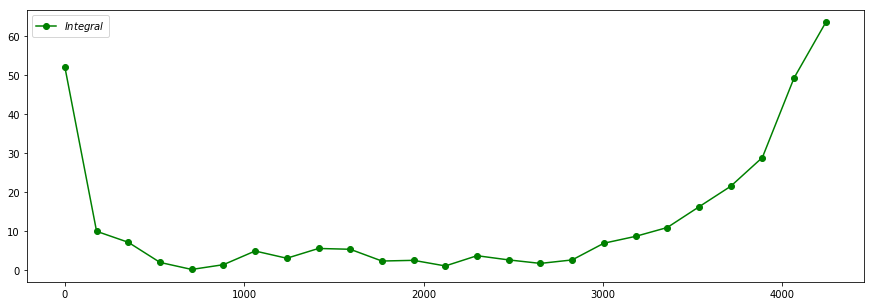

In [38]:
comparar22 = fpeha(x5, y5, x6, y6, longitud5, nbins5)

### Funcion de correlacion de Davis - Peebles

Valor de la integral de la funcion de correlacion:  173.92751264261315


<Figure size 432x288 with 0 Axes>

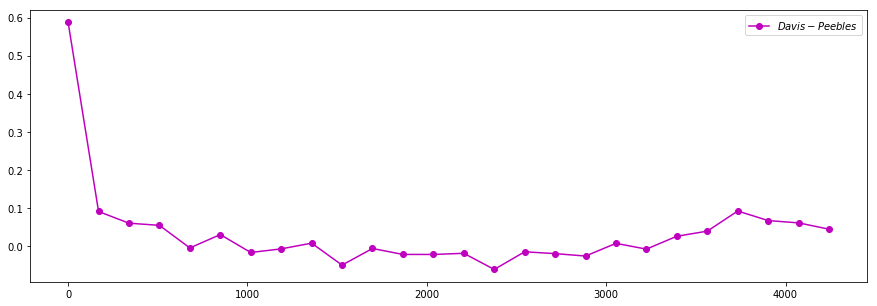

<Figure size 432x288 with 0 Axes>

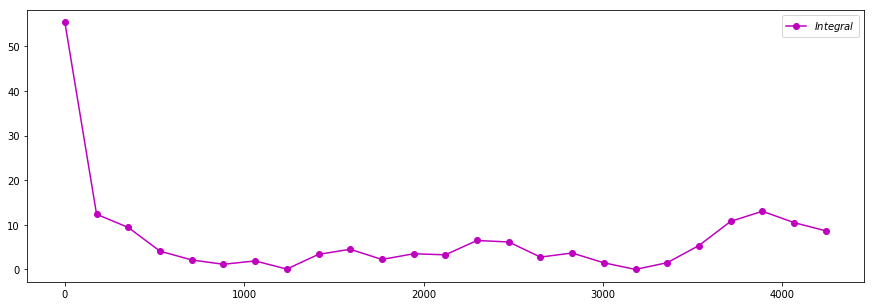

In [39]:
comparar33 = fdape(x5, y5, x6, y6, longitud5, nbins5)

### Funcion de correlacion de Landy - Szalay

Valor de la integral de la funcion de correlacion:  253.231273202545


<Figure size 432x288 with 0 Axes>

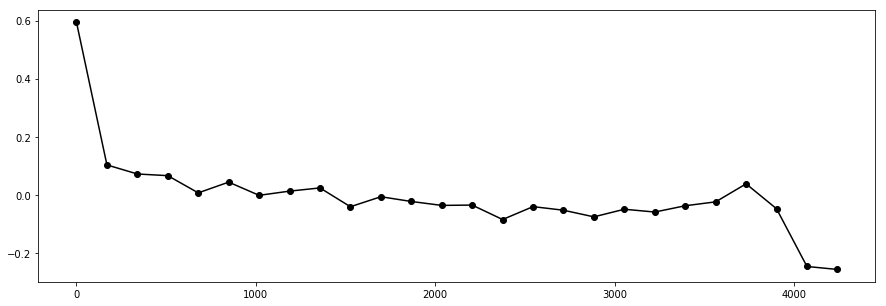

<Figure size 432x288 with 0 Axes>

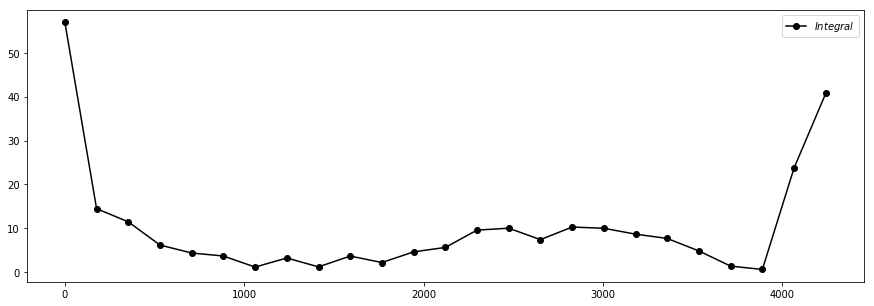

In [40]:
comparar44 = flasz(x5, y5, x6, y6, longitud5, nbins5)

### Para comparar las funciones de correlacion las graficamos en una sola figura

<Figure size 432x288 with 0 Axes>

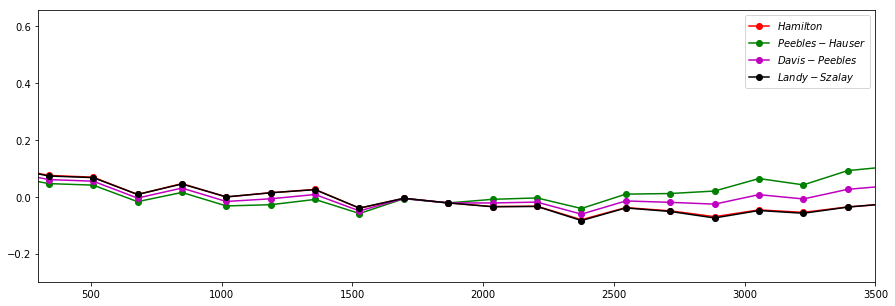

In [41]:
lmax5 = np.sqrt(2 * longitud5 ** 2)
x5 = np.linspace(0, lmax5, len(comparar11))
plt.figure()
plt.figure(figsize=(15,5))
plt.plot(x5, comparar11, 'bo-', label='$Hamilton$', color = 'r')
plt.plot(x5, comparar22, 'bo-', label='$Peebles - Hauser$', color = 'g')
plt.plot(x5, comparar33, 'bo-', label='$Davis - Peebles$', color = 'm')
plt.plot(x5, comparar44, 'bo-', label='$Landy - Szalay$', color = 'k')
plt.xlim(300, 3500)
plt.legend()

# Ejercicio 1d

### Generamos los histogramas DD, RR y DR con la muestra aleatoria y la ordenada para escoger un numero de bins adecuado.

In [42]:
dmalla6 = distancia(x7, y7) # Calculamos la distancia entre los puntos del arreglo en malla
drandom6 = distancia(x8, y8) # Calculamos la distancia entre los puntos del arreglo de puntos aleatorios
ddr6 = distanciadr(x7, y7, x8, y8) # Calculamos la distancia entre los puntos ordenados y los aleatorios

In [43]:
len(dmalla6)

46546776

In [44]:
nbins6 = 29

<Figure size 432x288 with 0 Axes>

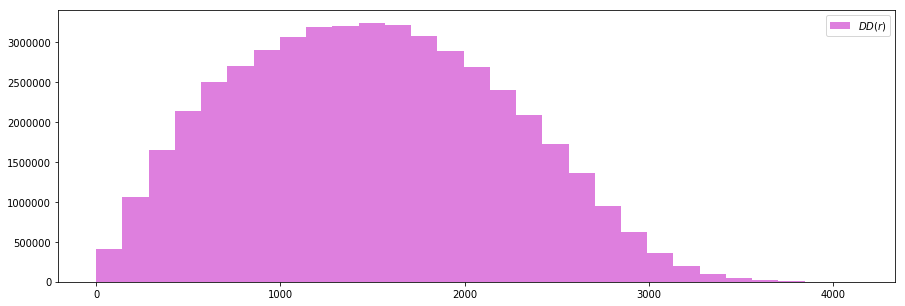

<Figure size 432x288 with 0 Axes>

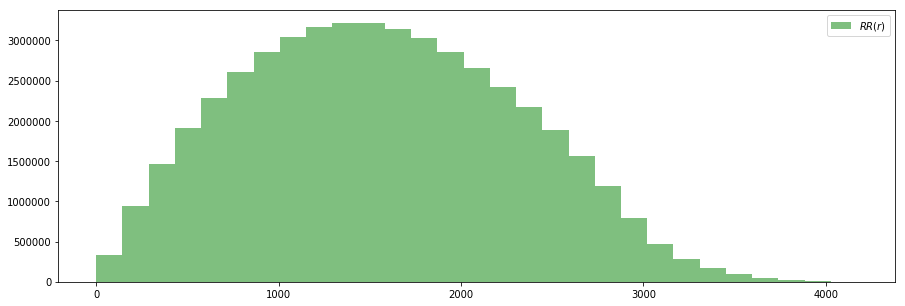

<Figure size 432x288 with 0 Axes>

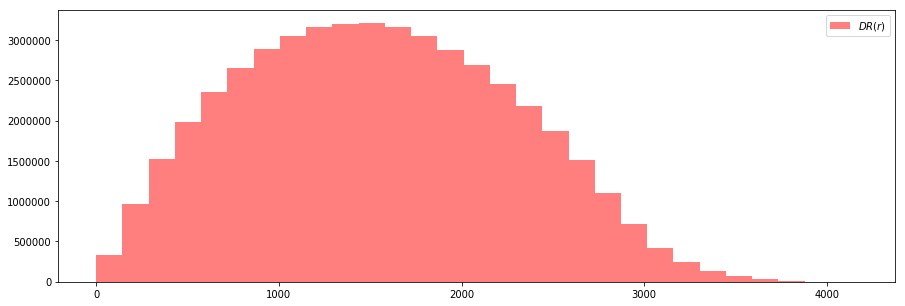

<Figure size 432x288 with 0 Axes>

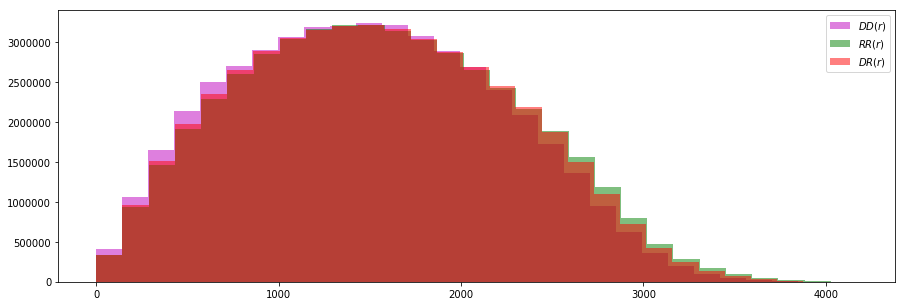

In [174]:
plt.figure()
plt.figure(figsize=(15,5))
plt.hist(dmalla6, bins=nbins6, color = 'm' , alpha =0.5, label='$DD(r)$')
plt.legend()
plt.figure()
plt.figure(figsize=(15,5))
plt.hist(drandom6, bins=nbins6, color = 'g' , alpha =0.5, label='$RR(r)$')
plt.legend()
plt.figure()
plt.figure(figsize=(15,5))
plt.hist(ddr6, bins=nbins6, color = 'r' , alpha =0.5, label='$DR(r)$')
plt.legend()
plt.figure()
plt.figure(figsize=(15,5))
plt.hist(dmalla6, bins=nbins6, color = 'm' , alpha =0.5, label='$DD(r)$')
plt.hist(drandom6, bins=nbins6, color = 'g' , alpha =0.5, label='$RR(r)$')
plt.hist(ddr6, bins=nbins6, color = 'r' , alpha =0.5, label='$DR(r)$')
plt.legend()

### Calculamos los estimadores y su integral

### Funcion de correlacion de Hamilton

Valor de la integral de la funcion de correlacion:  1073.4039037042694


<Figure size 432x288 with 0 Axes>

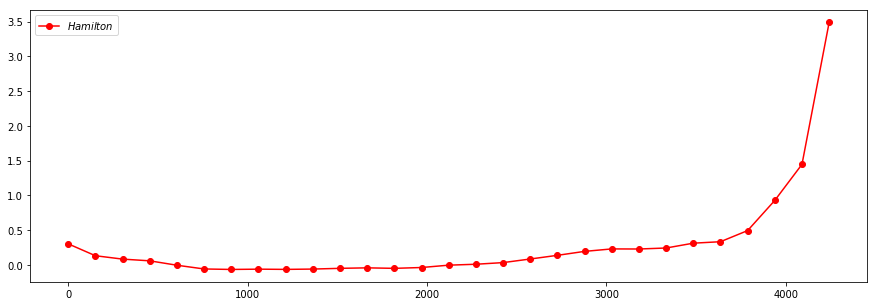

<Figure size 432x288 with 0 Axes>

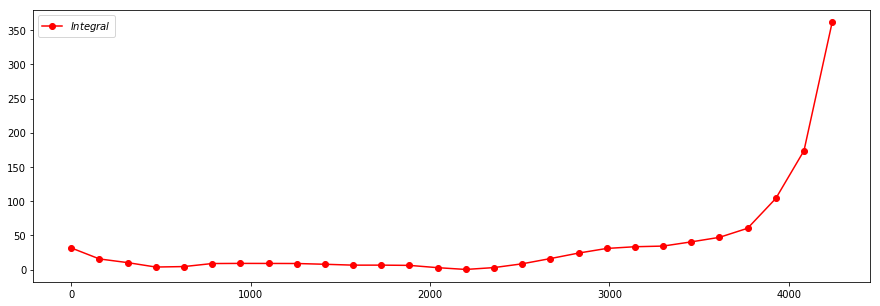

In [45]:
compararaa = fham(x7, y7, x8, y8, longitud5, nbins6)

### Funcion de correlacion de Peebles - Hauser

Valor de la integral de la funcion de correlacion:  372.5824523392057


<Figure size 432x288 with 0 Axes>

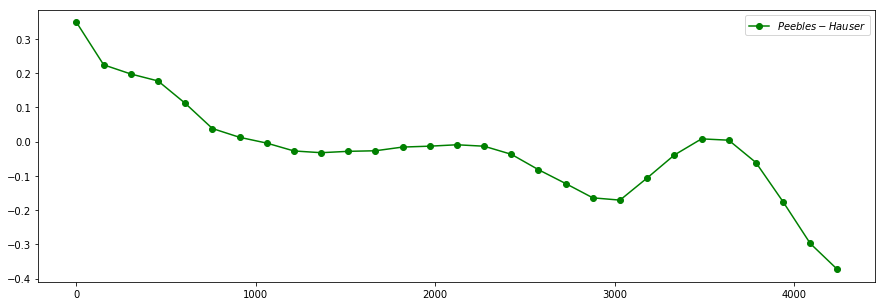

<Figure size 432x288 with 0 Axes>

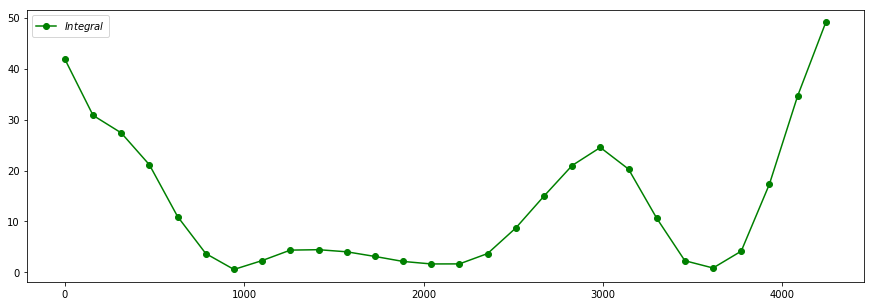

In [46]:
compararbb = fpeha(x7, y7, x8, y8, longitud5, nbins6)

### Funcion de correlacion de Davis - Peebles

Valor de la integral de la funcion de correlacion:  365.6047741732699


<Figure size 432x288 with 0 Axes>

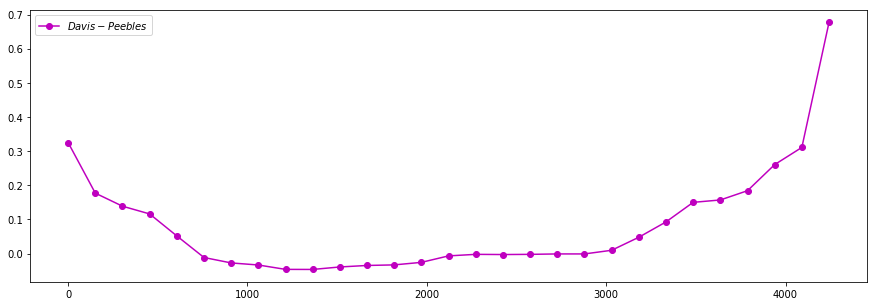

<Figure size 432x288 with 0 Axes>

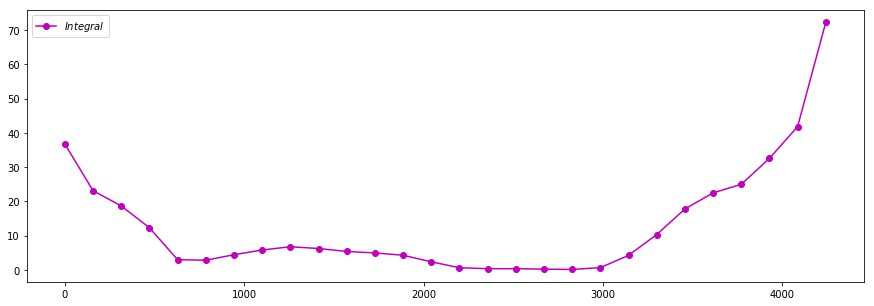

In [47]:
compararcc = fdape(x7, y7, x8, y8, longitud5, nbins6)

### Funcion de correlacion de Landy - Szalay

Valor de la integral de la funcion de correlacion:  646.103322887795


<Figure size 432x288 with 0 Axes>

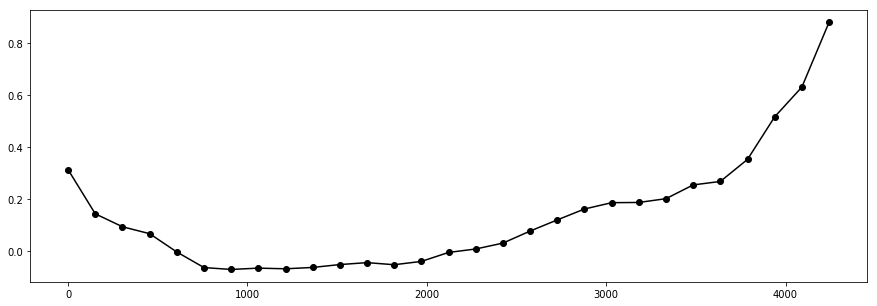

<Figure size 432x288 with 0 Axes>

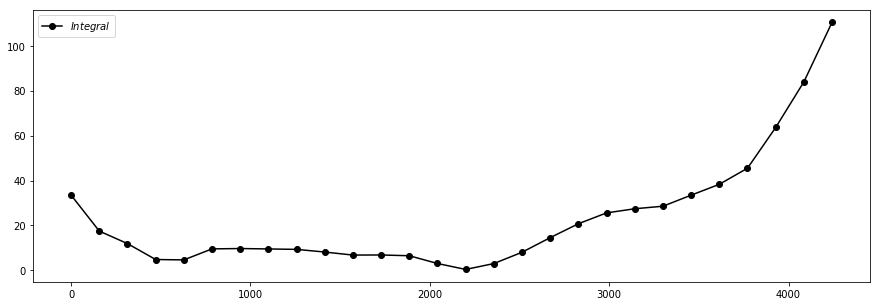

In [48]:
comparardd = flasz(x7, y7, x8, y8, longitud5, nbins6)

### Para comparar las funciones de correlacion las graficamos en una sola figura

<Figure size 432x288 with 0 Axes>

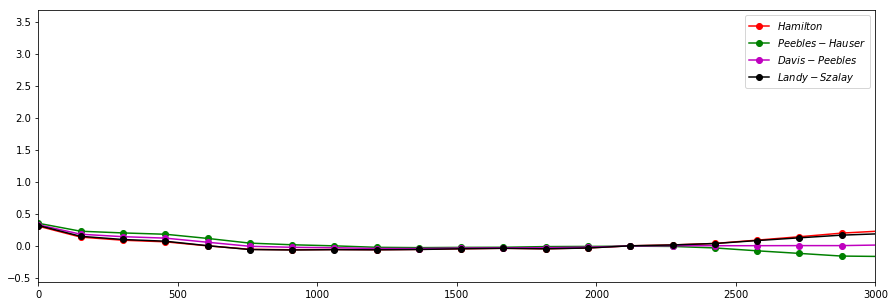

In [49]:
lmax7 = np.sqrt(2 * longitud5 ** 2)
x9 = np.linspace(0, lmax7, len(compararaa))
plt.figure()
plt.figure(figsize=(15,5))
plt.plot(x9, compararaa, 'bo-', label='$Hamilton$', color = 'r')
plt.plot(x9, compararbb, 'bo-', label='$Peebles - Hauser$', color = 'g')
plt.plot(x9, compararcc, 'bo-', label='$Davis - Peebles$', color = 'm')
plt.plot(x9, comparardd, 'bo-', label='$Landy - Szalay$', color = 'k')
plt.xlim(0, 3000)
plt.legend()